In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Coloque os arquivos das tabelas na pasta Content, por favor.")

# Caminhos dos arquivos CSV
caminho_arquivos = {
    "product": "/content/product.csv",
    "rideaddress_v1": "/content/rideaddress_v1.csv",
    "rideestimative_v3": "/content/rideestimative_v3.csv",
    "ride_v2": "/content/ride_v2.csv"
}

dataframes = {}

# Coleta dos Dados Iniciais
for nome, path in caminho_arquivos.items():
    dataframes[nome] = pd.read_csv(path, delimiter=";")
print("")
print("Funcionando")

<ipython-input-4-d1aed99b7333>:17: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[nome] = pd.read_csv(path, delimiter=";")


Funcionando


In [5]:
# Descrição dos Dados
for nome, df in dataframes.items():
    print(f"\n### Primeiras 3 linhas do dataset {nome}:\n")
    print(df.head(3))

for nome, df in dataframes.items():
    print(f"\n### Estatísticas do datasett {nome}:\n")
    print(df.describe(include='all'))
    print("\nContagem dos valores únicos por coluna:\n")
    print(df.nunique())


### Primeiras 3 linhas do dataset product:

  ProductID  ProviderID  CategoryID Description
0     99POP           3           1       99POP
1         1           1           5  Taxi Comum
2         2           1           6   Executivo

### Primeiras 3 linhas do dataset rideaddress_v1:

   RideAddressID                                            Address  \
0        2334277  Rua João Pinheiro, 585 - Rua João Pinheiro - B...   
1        2334278  Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...   
2        2334279  Rodovia Rafael da Rocha Pires, 1883 - Rodovia ...   

                                              Street Number  \
0                                  Rua João Pinheiro    585   
1  Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...    450   
2                      Rodovia Rafael da Rocha Pires   1883   

                    Neighborhood City   State                  Lat  \
0              Rua João Pinheiro  NaN  Brasil  -26.329754299999998   
1                            NaN 

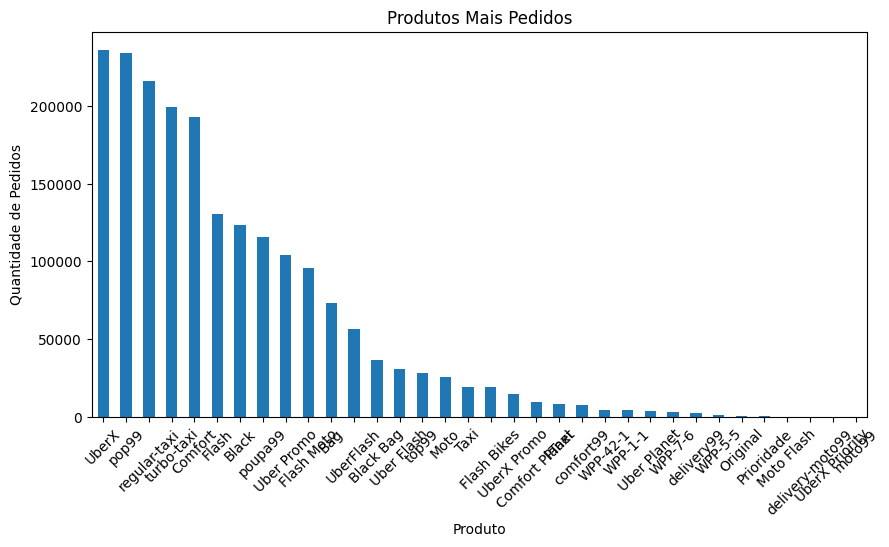

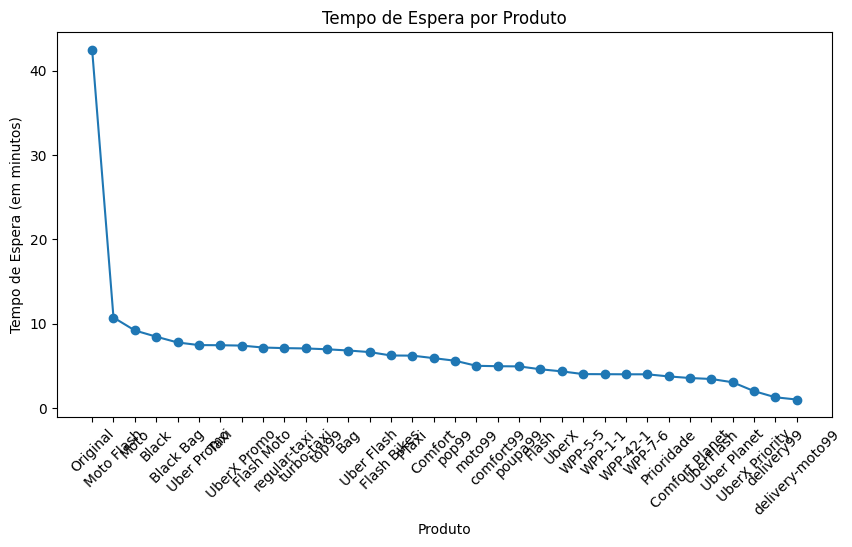

In [6]:
# Exploração dos Dados:
ride_estimative_df = dataframes["rideestimative_v3"]

plt.figure(figsize=(10, 5))
ride_estimative_df["ProductID"].value_counts().plot(kind="bar")
plt.title("Produtos Mais Pedidos")
plt.xlabel("Produto")
plt.ylabel("Quantidade de Pedidos")
plt.xticks(rotation=45)
plt.show()

produtos_ordem = ride_estimative_df.groupby("ProductID")["WaitingTime"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.plot(produtos_ordem, marker='o', linestyle='-')
plt.title("Tempo de Espera por Produto")
plt.xlabel("Produto")
plt.ylabel("Tempo de Espera (em minutos)")
plt.xticks(rotation=45)
plt.show()

In [7]:
# Qualidade dos Dados
for nome, df in dataframes.items():
    print(f"\n### Qualidade dos Dados no dataset {nome}:\n")
    print("Valores ausentes por coluna:")
    print(df.isnull().sum())
    print("\nInformações duplicadas:")
    print(df.duplicated().sum())



### Qualidade dos Dados no dataset product:

Valores ausentes por coluna:
ProductID      0
ProviderID     0
CategoryID     0
Description    0
dtype: int64

Informações duplicadas:
0

### Qualidade dos Dados no dataset rideaddress_v1:

Valores ausentes por coluna:
RideAddressID             0
Address                   0
Street                 1897
Number               215630
Neighborhood         589968
City                 382202
State                231456
Lat                       0
Lng                       0
RideAddressTypeID         0
RideID                    0
dtype: int64

Informações duplicadas:
0

### Qualidade dos Dados no dataset rideestimative_v3:

Valores ausentes por coluna:
RideEstimativeID                        0
RideID                                  0
ProductID                               0
WaitingTime                             0
Price                                   0
FareID                             818225
Selected                                0
RideReas